Problem Statement (of the task): to create a K-Means clustering algorithm to group customers of a retail store based on their purchase history (here its the spending score)

#Importing the dataset

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("Mall_Customers.csv")

#Exploring the data

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df["Gender"].value_counts()

,count
Gender,
Female,112
Male,88


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


from exploring we have got to know that:
1. the data does not have null or missing values
2. all the features have the correct data types
3. Next we sre performing K-Means clustering

#Preprocessing the Data

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])

#Model

In [ ]:
num_clusters=[]
inertia=[]    #Inertia measures how well a dataset was clustered by K-Means

In [ ]:
from sklearn.cluster import KMeans
for i in range(1,11):
    model = KMeans(n_clusters=i,init='k-means++',random_state=42)
    model.fit(df)
    num_clusters.append(i)
    inertia.append(model.inertia_)

In [ ]:
pd.DataFrame({"num_clusters":num_clusters,"inertia":inertia})

,num_clusters,inertia
0,1,975512.060000
1,2,387065.713771
2,3,271396.562966
3,4,195401.198560
4,5,157505.720725
5,6,122751.823661
6,7,113329.536769
7,8,86202.773234
8,9,82250.949573
9,10,75284.782553


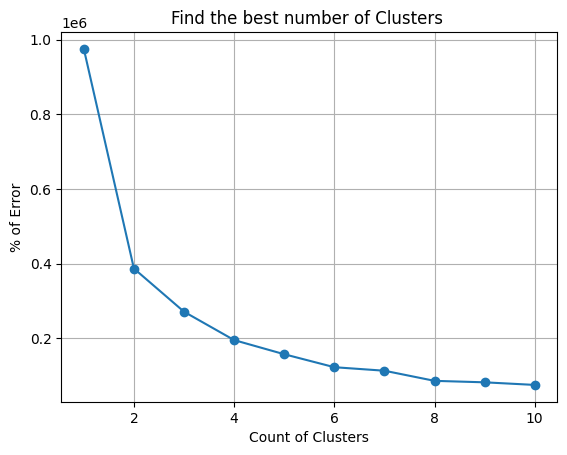

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(num_clusters, inertia,marker = 'o')
plt.title("Find the best number of Clusters ")
plt.xlabel("Count of Clusters")
plt.ylabel("% of Error")
plt.grid(True)
plt.show()

from this graph we can see that the number of optimal clusters are 4 (elbow curve method)

In [ ]:
model = KMeans(n_clusters=4,init='k-means++',random_state=42)
model.fit(df)

KMeans(n_clusters=4, random_state=42)

In [ ]:
model.inertia_

195401.19855991477

In [ ]:
predict=model.predict(df)

In [ ]:
df["clusters"] = predict

In [ ]:
df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
175,176,0,30,88,86,1
193,194,0,38,113,91,1
35,36,0,21,33,81,2
95,96,1,24,60,52,0
78,79,0,23,54,52,0


In [ ]:
cluster_1 = df[df.clusters == 0]
cluster_2 = df[df.clusters == 1]
cluster_3 = df[df.clusters == 2]
cluster_4 = df[df.clusters == 3]


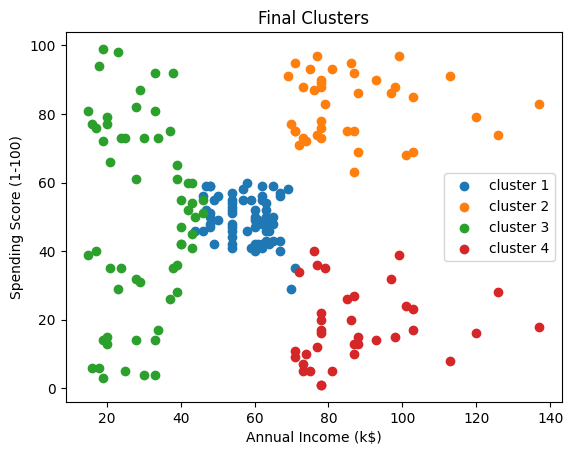

In [ ]:
plt.scatter(cluster_1['Annual Income (k$)'], cluster_1['Spending Score (1-100)'], label='cluster 1')
plt.scatter(cluster_2['Annual Income (k$)'], cluster_2['Spending Score (1-100)'], label='cluster 2')
plt.scatter(cluster_3['Annual Income (k$)'], cluster_3['Spending Score (1-100)'], label='cluster 3')
plt.scatter(cluster_4['Annual Income (k$)'], cluster_4['Spending Score (1-100)'], label='cluster 4')
plt.title('Final Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()


#Analyzing the data after clustering them

<Axes: xlabel='clusters', ylabel='count'>

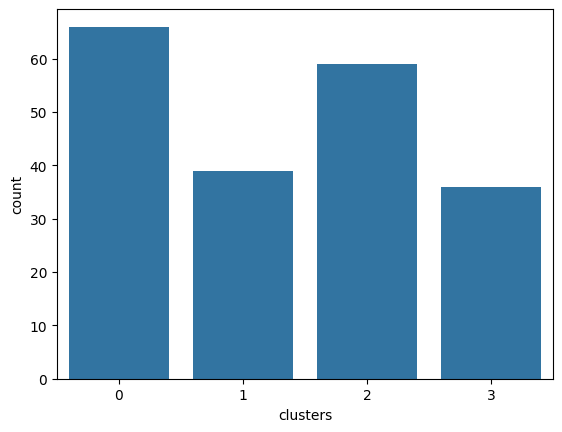

In [ ]:
sns.countplot(x = df.clusters)                            #number of people in each cluster

<Axes: ylabel='count'>

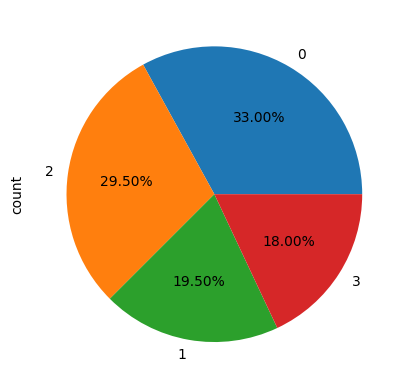

In [ ]:
df.clusters.value_counts().plot.pie(autopct= '%0.2f%%')                    #number of people in each cluster

<Axes: xlabel='clusters', ylabel='Annual Income (k$)'>

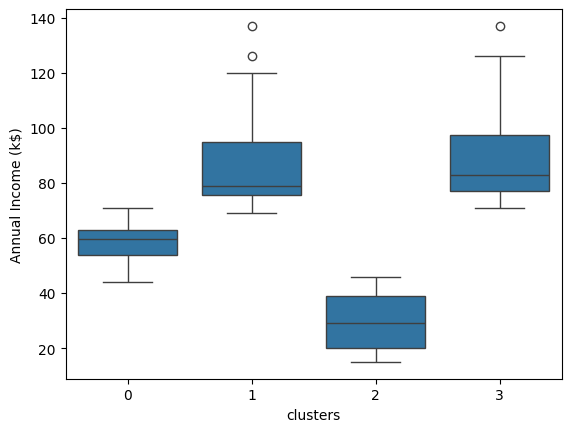

In [ ]:
sns.boxplot(x=df.clusters,y=df['Annual Income (k$)'])                    #cluster to annual income comparision

<Axes: xlabel='clusters', ylabel='Spending Score (1-100)'>

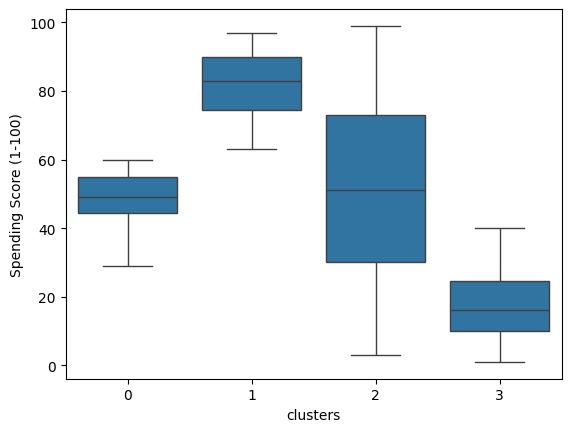

In [ ]:
sns.boxplot(x=df.clusters,y=df['Spending Score (1-100)'])                 #cluster to spending score comparison

<Axes: xlabel='Age', ylabel='Count'>

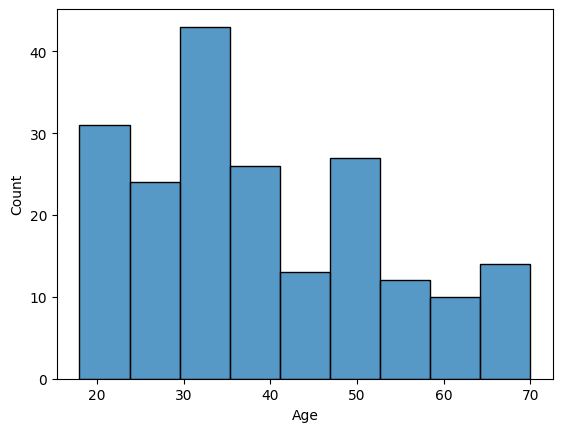

In [ ]:
sns.histplot(df.Age)                                                     #age distribution

<Axes: xlabel='Gender', ylabel='count'>

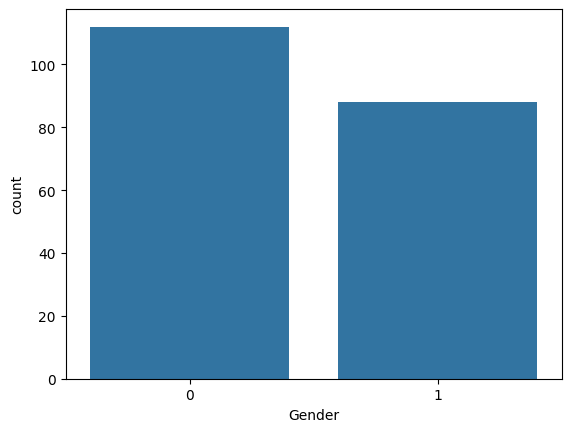

In [ ]:
sns.countplot(x=df["Gender"])                              #gender distribution

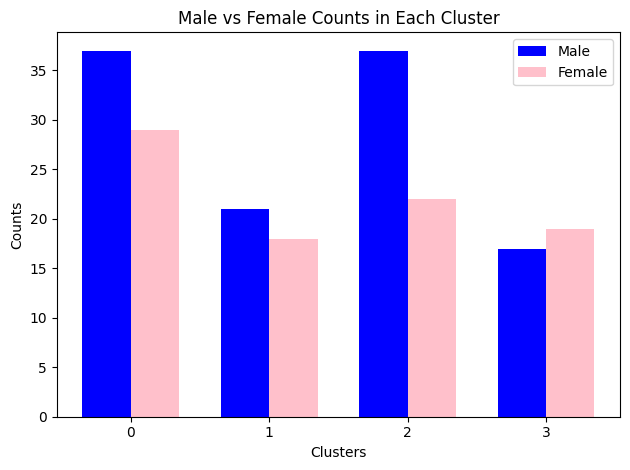

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

grouped_data = df.groupby(['clusters', 'Gender']).size().unstack(fill_value=0)

male_counts = grouped_data.get(0, [0] * len(grouped_data))
female_counts = grouped_data.get(1, [0] * len(grouped_data))

clusters = grouped_data.index.astype(str)
bar_width = 0.35
x = np.arange(len(clusters))

plt.bar(x - bar_width / 2, male_counts, width=bar_width, label='Male', color='blue')
plt.bar(x + bar_width / 2, female_counts, width=bar_width, label='Female', color='pink')

plt.xlabel('Clusters')
plt.ylabel('Counts')
plt.title('Male vs Female Counts in Each Cluster')
plt.xticks(x, clusters)
plt.legend()

plt.tight_layout()
plt.show()
